In [9]:
import zarr
import copick
import numpy as np

from eda.napari_testing import overlay

In [10]:
# Load the configuration
copickRoot = copick.from_file('../copick_config.json')

run = copickRoot.get_run('TS_5_4')

voxel_spacing = run.get_voxel_spacing(10.000)

# Access the specific tomogram
tomogram = voxel_spacing.get_tomogram("denoised")

# Access the Zarr data
zarr_store = tomogram.zarr()
zarr_group = zarr.open(zarr_store)

# Now you can interact with the Zarr data
print(zarr_group.info)

Name        : /
Type        : zarr.hierarchy.Group
Read-only   : False
Store type  : zarr.storage.FSStore
No. members : 3
No. arrays  : 3
No. groups  : 0
Arrays      : 0, 1, 2



In [11]:
# Assuming `zarr_group` is your root group
array_0 = zarr_group['0']
array_1 = zarr_group['1']
array_2 = zarr_group['2']

for array_name, array in zarr_group.items():
    print(f"Array {array_name}:")
    print("  Shape:", array.shape)
    print("  Data type:", array.dtype)

Array 0:
  Shape: (184, 630, 630)
  Data type: float32
Array 1:
  Shape: (92, 315, 315)
  Data type: float32
Array 2:
  Shape: (46, 158, 158)
  Data type: float32


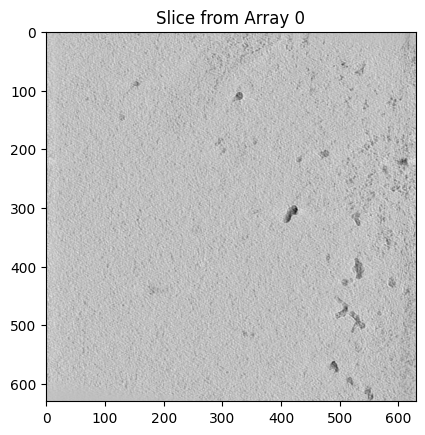

In [12]:
import matplotlib.pyplot as plt

# Visualize a single slice along the first axis
slice_0 = array_0[0, :, :]  # Adjust slicing as needed
plt.imshow(slice_0, cmap='gray')
plt.title("Slice from Array 0")
plt.show()


In [13]:
# Metadata for the group
print("Group attributes:", zarr_group.attrs.asdict())

# Metadata for an array
print("Array 0 attributes:", array_0.attrs.asdict())


Group attributes: {'multiscales': [{'axes': [{'name': 'z', 'type': 'space', 'unit': 'angstrom'}, {'name': 'y', 'type': 'space', 'unit': 'angstrom'}, {'name': 'x', 'type': 'space', 'unit': 'angstrom'}], 'datasets': [{'coordinateTransformations': [{'scale': [10.012444196428572, 10.012444196428572, 10.012444537618887], 'type': 'scale'}], 'path': '0'}, {'coordinateTransformations': [{'scale': [20.024888392857143, 20.024888392857143, 20.024889075237773], 'type': 'scale'}], 'path': '1'}, {'coordinateTransformations': [{'scale': [40.049776785714286, 40.049776785714286, 40.04977815047555], 'type': 'scale'}], 'path': '2'}], 'metadata': {}, 'name': '/', 'version': '0.4'}]}
Array 0 attributes: {}
